In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/home/amjad-alhadeed/Downloads/athlete_events.csv")

In [3]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Data Preparation and Cleaning

In [4]:
# Get a summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
# Check for missing values in each column
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
# Fill missing values in 'Age', 'Height', and 'Weight' with median
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Height'] = df['Height'].fillna(df['Height'].median())
df.loc[:, 'Weight'] = df['Weight'].fillna(df['Weight'].median())

In [7]:
# Counting for each unique value in the 'Sex' column
df['Sex'].value_counts()

Sex
M    196594
F     74522
Name: count, dtype: int64

In [8]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [9]:
# Get the number of unique cities 
unique_cities = df['City'].unique()
number_of_cities = len(unique_cities)

number_of_cities, unique_cities

(42,
 array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
        'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
        'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
        'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
        'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
        'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
        'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
        'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
        'Garmisch-Partenkirchen'], dtype=object))

In [10]:
# Count athletes per year and sort by year
athletes_per_year = df['Year'].value_counts().sort_index()
athletes_per_year

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: count, dtype: int64

In [11]:
# Get the athlete with the most participations, their ID, and the count of their participations
most_participated = df['Name'].mode()[0]
athlete_id = df[df['Name'] == most_participated]['ID'].values[0]
participation_count = df['Name'].value_counts().max()
most_participated, athlete_id, participation_count

('Heikki Ilmari Savolainen', np.int64(106296), np.int64(39))

In [12]:
# Group by Year and Medal to count medals
medal_counts = df.groupby(['Year', 'Medal']).size().reset_index(name='Count')
medals_p = medal_counts.pivot(index='Year', columns='Medal', values='Count')

# Rename the columns for medal counts
medals_p.columns = ['N_Bronze', 'N_Gold', 'N_Silver']
medals_p = medals_p[['N_Gold', 'N_Silver', 'N_Bronze']]
medals_p_reset = medals_p.reset_index()

medals_p_reset

,Year,N_Gold,N_Silver,N_Bronze
0,1896,62,43,38
1,1900,198,220,175
2,1904,173,163,150
3,1906,157,156,145
4,1908,294,281,256
5,1912,326,315,300
6,1920,493,448,367
7,1924,332,319,311
8,1928,275,267,281
9,1932,261,246,232


In [13]:
# Get the number of gold medal winners by city
gold_medal_winners = df[df['Medal'] == 'Gold'].groupby('City').size().reset_index(name='Number of Gold Medal Winners')
gold_medal_winners

,City,Number of Gold Medal Winners
0,Albertville,104
1,Amsterdam,245
2,Antwerpen,493
3,Athina,883
4,Atlanta,608
5,Barcelona,559
6,Beijing,671
7,Berlin,312
8,Calgary,87
9,Chamonix,55


## Visualization

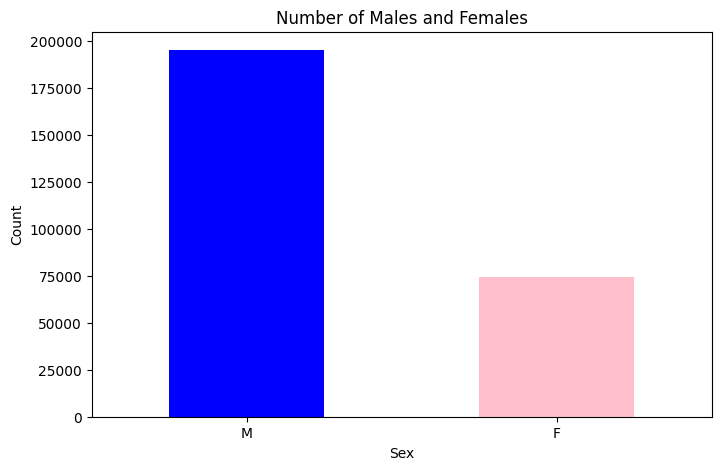

In [15]:
plt.figure(figsize=(8, 5))
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Males and Females')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot1.png', dpi=300, bbox_inches='tight') 

plt.show()

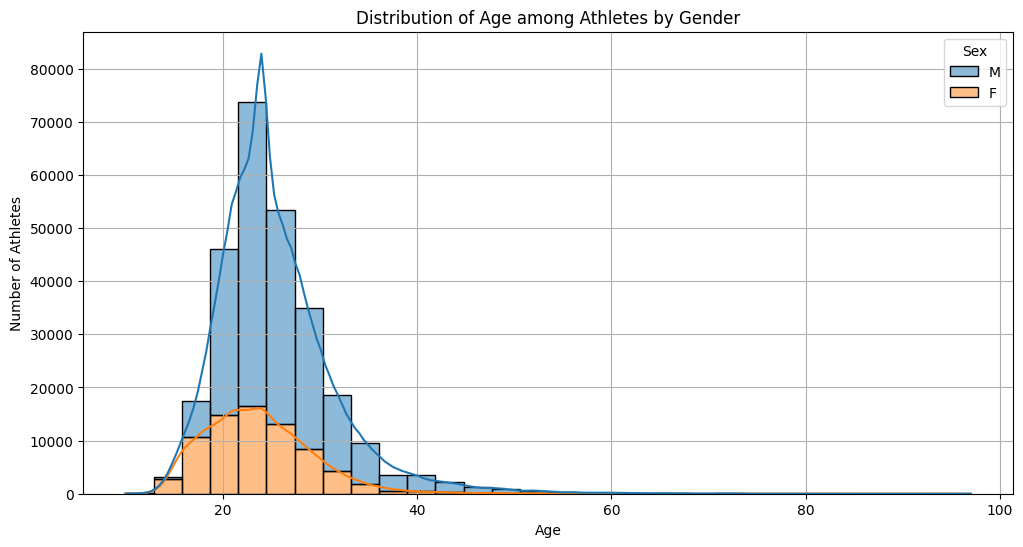

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', kde=True, bins=30)
plt.title('Distribution of Age among Athletes by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.grid(True)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot2.png', dpi=300, bbox_inches='tight') 

plt.show()

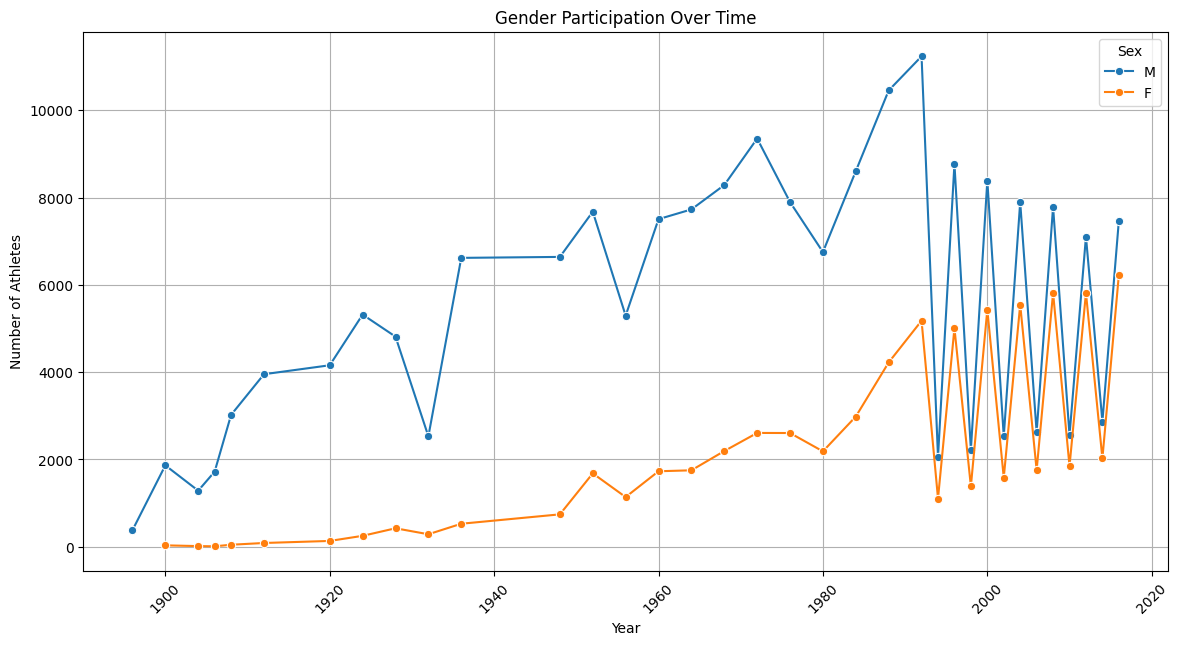

In [17]:
gender_participation = df.groupby(['Year', 'Sex']).size().reset_index(name='Number of Athletes')

plt.figure(figsize=(14, 7))
sns.lineplot(data=gender_participation, x='Year', y='Number of Athletes', hue='Sex', marker='o')
plt.title('Gender Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.xticks(rotation=45)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot3.png', dpi=300, bbox_inches='tight') 

plt.show()

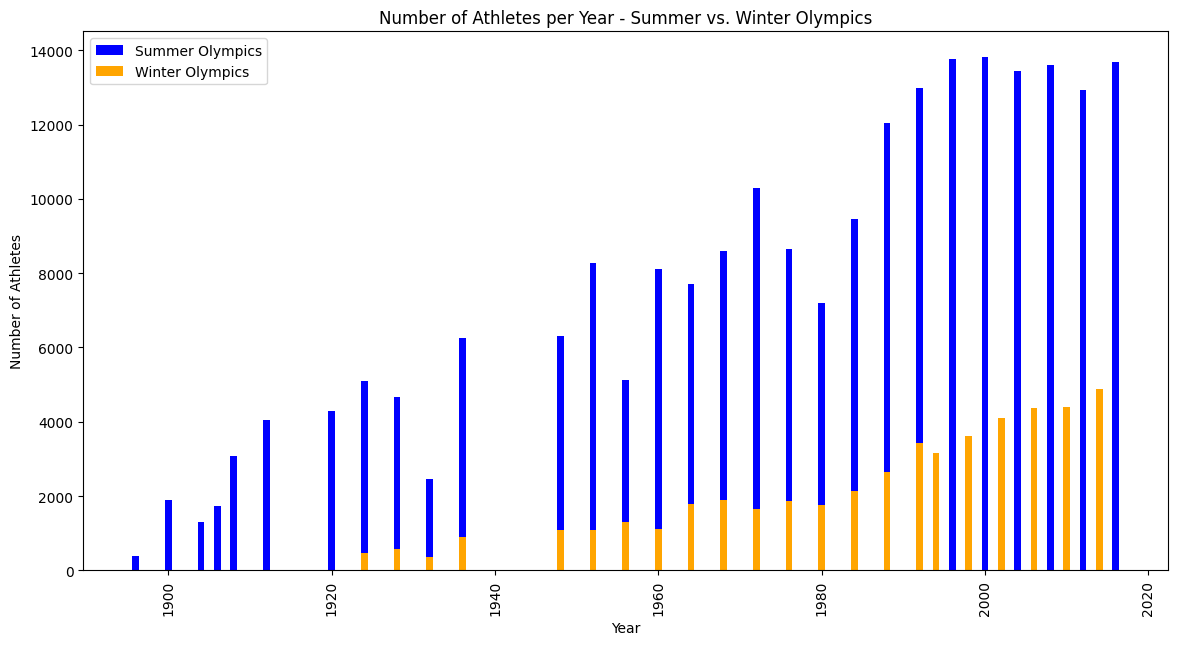

In [18]:
summer_data = df[df['Season'] == 'Summer']['Year'].value_counts().sort_index()
winter_data = df[df['Season'] == 'Winter']['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.bar(summer_data.index, summer_data.values, color='blue', label='Summer Olympics')
plt.bar(winter_data.index, winter_data.values, color='orange', label='Winter Olympics')

plt.title('Number of Athletes per Year - Summer vs. Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=90)
plt.legend()

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot5.png', dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_6326/544249964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medals_by_sport.head(10), y='Sport', x='Medal Count', palette='viridis')


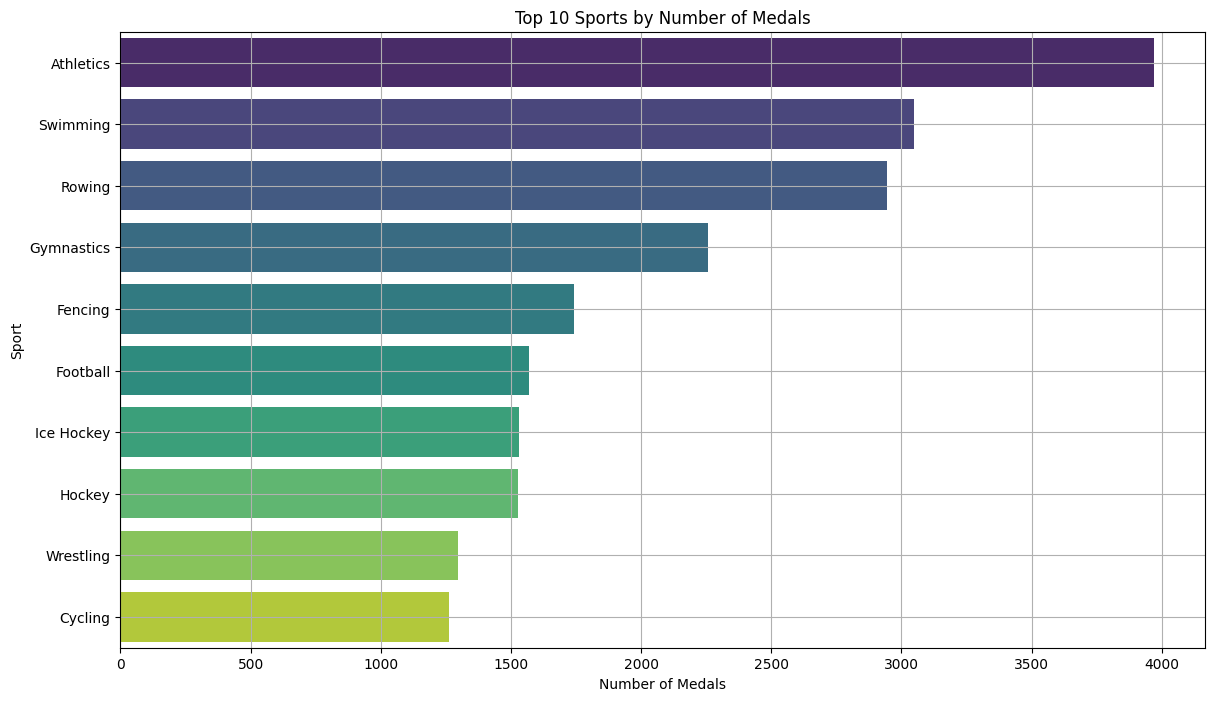

In [19]:
medals_by_sport = df[df['Medal'].notna()]['Sport'].value_counts().reset_index()
medals_by_sport.columns = ['Sport', 'Medal Count']

# Plotting the top sports by medal count
plt.figure(figsize=(14, 8))
sns.barplot(data=medals_by_sport.head(10), y='Sport', x='Medal Count', palette='viridis')
plt.title('Top 10 Sports by Number of Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.grid(True)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot6.png', dpi=300, bbox_inches='tight') 

plt.show()

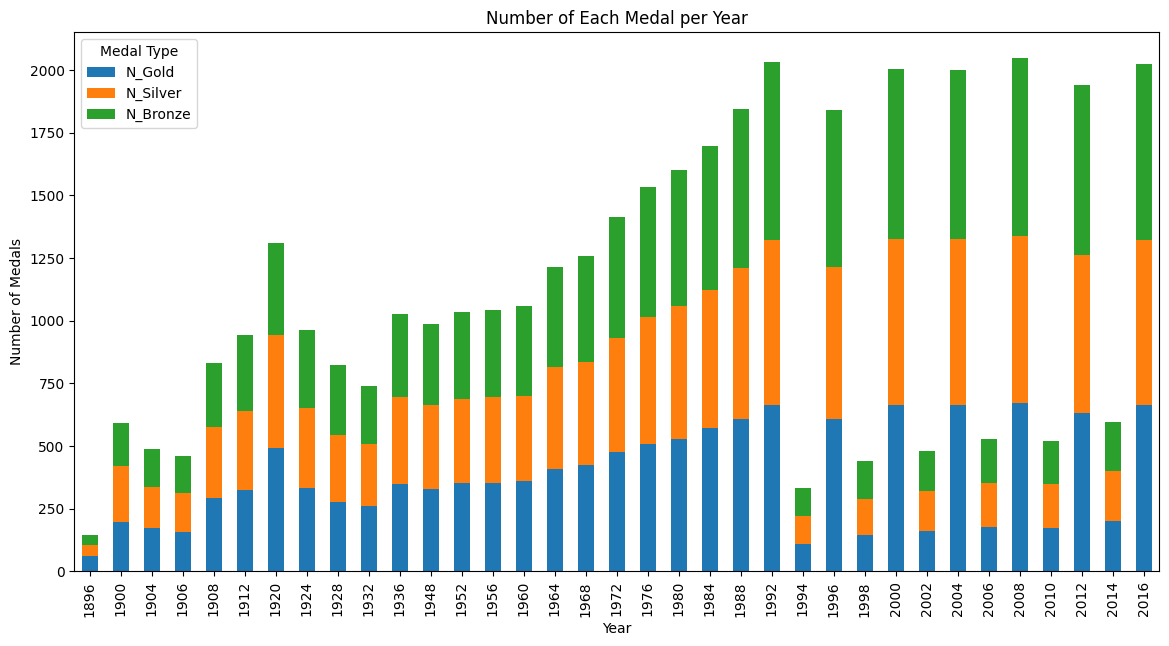

In [20]:
medals_p.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Number of Each Medal per Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.legend(title='Medal Type')

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot7.png', dpi=300, bbox_inches='tight') 

plt.show()

In [ ]:
# Calculate the total missing data by year 
total_missing_by_year = df.isnull().groupby(df['Year']).sum().sum(axis=1).reset_index(name='Total Missing Data')
total_missing_by_year

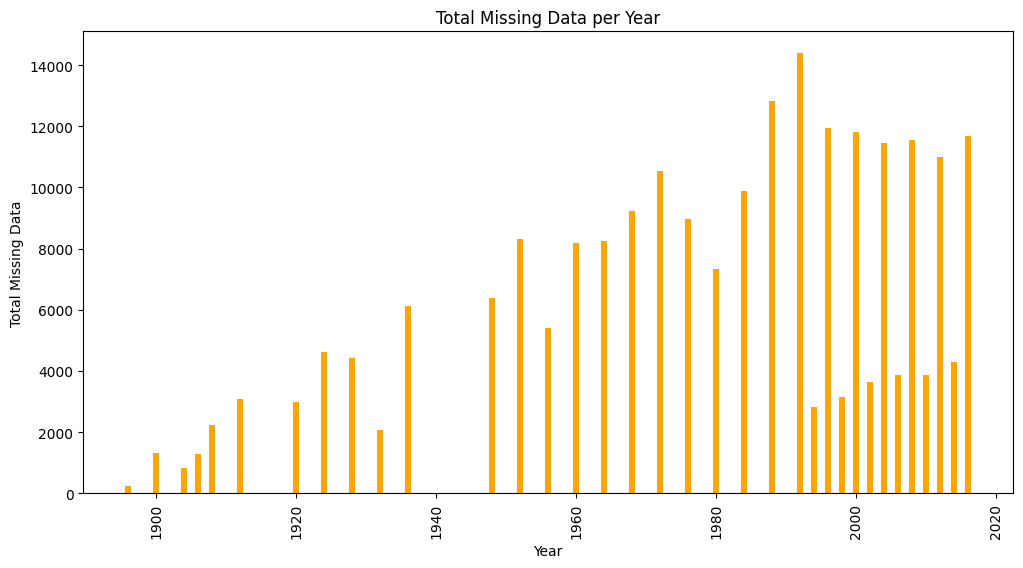

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(total_missing_by_year['Year'], total_missing_by_year['Total Missing Data'], color='orange')
plt.title('Total Missing Data per Year')
plt.xlabel('Year')
plt.ylabel('Total Missing Data')
plt.xticks(rotation=90)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plot8.png', dpi=300, bbox_inches='tight') 

plt.show()